In [462]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [463]:
train = pd.read_csv('train.csv')

In [464]:
test = pd.read_csv('test.csv')

# Let's Perform the Exploratory Data Analysis on a Titanic Training Data Set

In [465]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [466]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [467]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


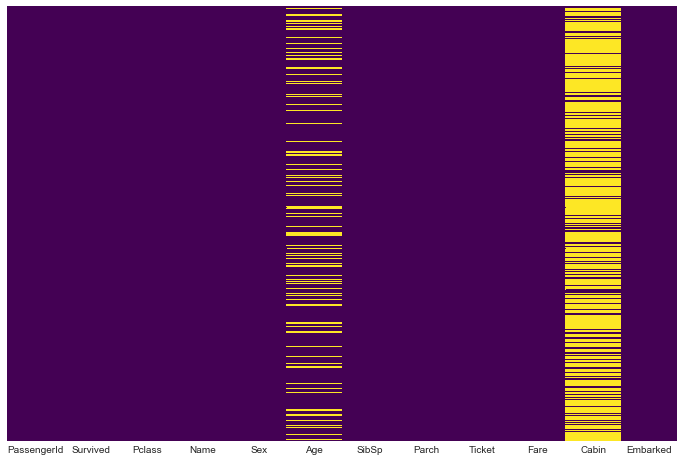

In [468]:
#To show missing data I will use Heatmap
plt.figure(figsize = (12,8))
sns.heatmap(train.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

As we can see Age column and Cabin have missing data. To Filling or Cleaning the data we can use different kind of methods 

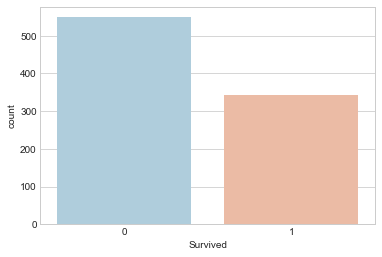

In [469]:
#Let's first check how people survived in a training set 
sns.countplot(train['Survived'], palette = 'RdBu_r')
#plt.legend(train['Sex'])

As we can almost 330 people are survivors


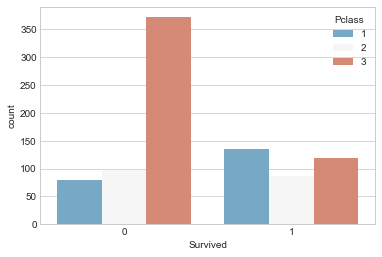

In [470]:
#Now we can another property to visualize Survivors along with their class 
sns.countplot(train['Survived'], palette = 'RdBu_r', hue = train['Pclass'])

Visualization shows that passengers who didn't survive belongs to Class 3(Poor people we can say) and Class 1(Rich people) survived more than others

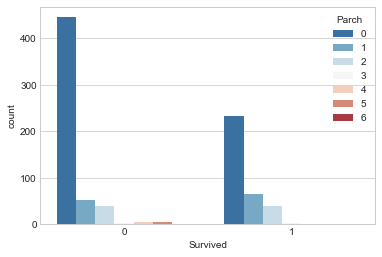

In [471]:
#Now we can another property to visualize how many were Males and Females
sns.countplot(train['Survived'], palette = 'RdBu_r', hue = train['Parch'])

Above visualization shows that most males died than females

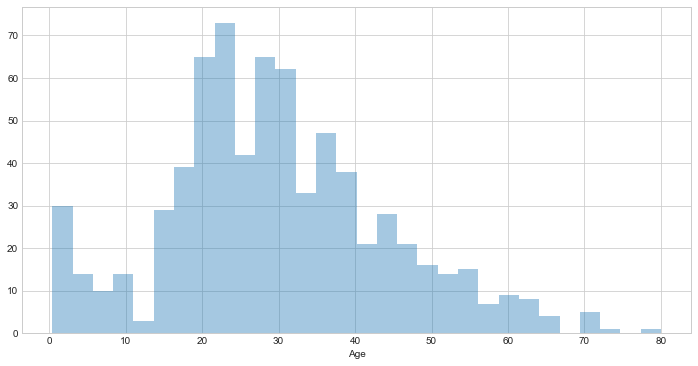

In [472]:
#Now we can visualize Age of Passengers
plt.figure(figsize =(12,6))
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna(), kde = False, bins = 30)

As we can see most Ages are between 19 to 32

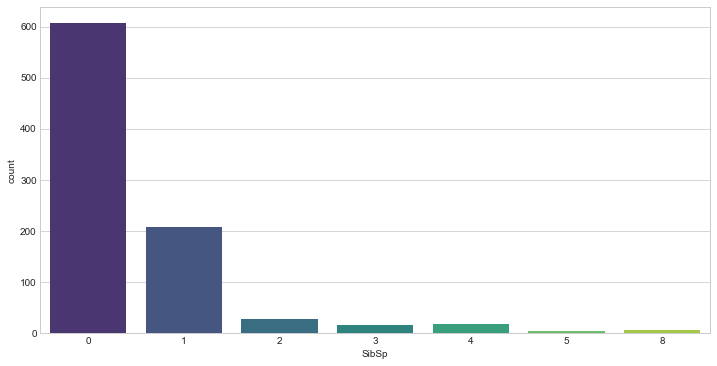

In [473]:
#Here we show Passengers count of Siblings and Spouses
plt.figure(figsize = (12,6))
sns.countplot(train['SibSp'], palette = 'viridis')

Visualization shows most passengers don't have Siblings and Spouses in a Ship.

# Before Jumping to the Data Analysis on a Titanic Data Test, let's perform data Cleaning on a Titanic Training Data Set.

During Exploratory Data Analysis we find out that 'Age' feature and 'Cabin' feature were missing data.
Lot's of ways we can handle these kind of features. In this Data Cleaning process, we will perform simple techniques

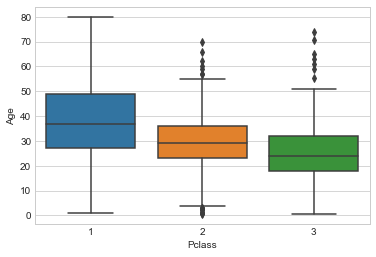

In [474]:
#Let's visualize to find out the Average Age's of passengers based on their 'Pclass'
sns.boxplot(x= 'Pclass', y = 'Age', data = train)

As we can see, Average Age of Class 1 passengers is 37.

Average Age of Class 2 passengers is 29.

Average Age of Class 3 passengers is 24.

In [475]:
#Now let's define a function to fill the 'Age' column's missing fields by the average age of particular classes
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [476]:
#call a function to fill the missing 'Age' data
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)

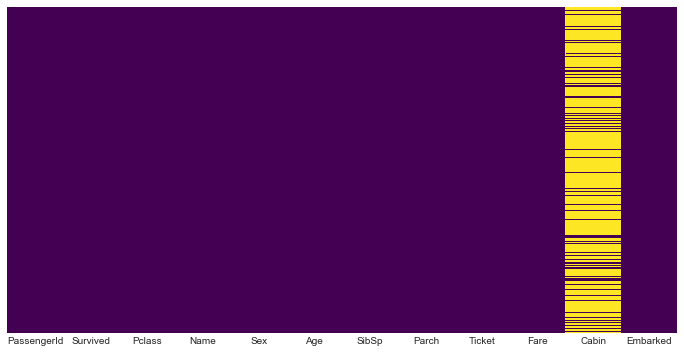

In [477]:
#Let's visualize the training set again by HeatMap
plt.figure(figsize = (12,6))
sns.heatmap(train.isnull(), cmap = 'viridis', yticklabels = False, cbar = False)

As we can see 'Age' column is filled with the Average ages of each particular passenger class.

In [478]:
#It's better for us to drop the 'Cabin' column because lot of data is missing in the 'cabin' column
train.drop('Cabin', axis = 1, inplace = True)

In [479]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now let's look out those features we don't need in our model:
1. PassengerID
2. Name
3. Ticket
4. Embarked

In [480]:
#Now let's drop these features in our train data set
train.drop(['PassengerId','Name','Ticket','Embarked'], axis = 1, inplace = True)

Before we use this data set to our model we need to create dummy variables for categorial features to make it easy for the Model.

We can look into our data set, there is only one categorical feature 'Sex'. Let's create dummy for it.

In [481]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [482]:
#Now let's concatenate the sex Dataframe with train Dataframe
train = pd.concat([train,sex], axis = 1)

In [483]:
#Rename the 'male' column and drop the 'Sex' column
train.drop('Sex',axis = 1,inplace = True)

In [484]:
#Our cleaned Train Data set:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# Let's concentrate on the Testing Data set and clean it up

In [485]:
#Our Test data set
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [486]:
#Summary of a Dataframe 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [487]:
#Generates Descriptive Statistics
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


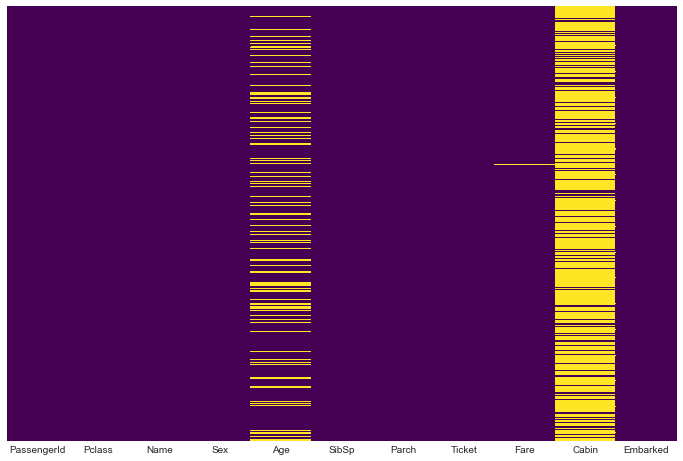

In [488]:
#visualize the missing data by heatmap
plt.figure(figsize = (12,8))
sns.heatmap(test.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

We need to perform same operations on test data set for cleaning features(where data is missing)

Let's fill in the missing data of 'Age' column with average age with respect to passenger class

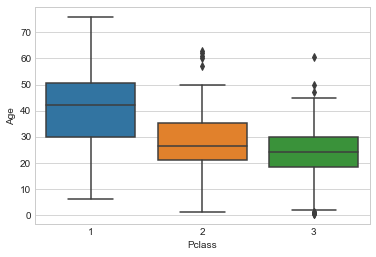

In [489]:
#Let's visualize to find out the Average Age's of passengers based on their 'Pclass'
sns.boxplot(x = 'Pclass', y = 'Age', data = test)

As we can see, Average Age of Class 1 passengers is 42.

Average Age of Class 2 passengers is 27.

Average Age of Class 3 passengers is 24.

In [490]:
#Now let's define a function to fill the 'Age' column's missing fields by the average age of particular classes
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 27
        else:
            return 24
    else:
        return Age

In [491]:
#call a function to fill the missing 'Age' data
test['Age'] = test[['Age','Pclass']].apply(impute_age, axis = 1)

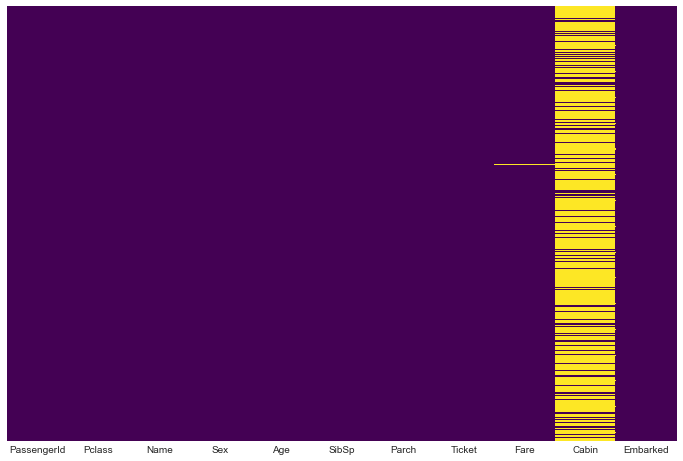

In [492]:
#visualize the missing data of test data by heatmap
plt.figure(figsize = (12,8))
sns.heatmap(test.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

As we can see 'Age' column is filled with the Average ages of each particular passenger class.

In [493]:
#Let's first drop the features we don't need to test for predictions 
PassengerId = pd.DataFrame(test['PassengerId'])
test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'], axis = 1, inplace = True)

(0, 150)

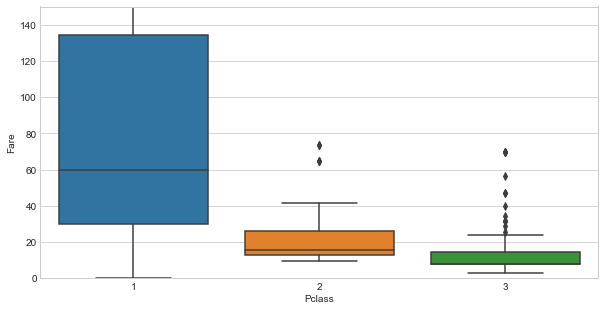

In [494]:
#Let's visualize to find out the Average Fare's of passengers based on their 'Pclass'
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Pclass', y = 'Fare', data = test)
plt.ylim(0,150)

In [495]:
#Now feature 'Fare' has some missing data. Let's try to handle it
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 60
        elif Pclass == 2:
            return 16
        else:
            return 8
    else:
        return Fare

In [496]:
#call a function to fill the missing 'Fare' data
test['Fare'] = test[['Fare','Pclass']].apply(impute_fare, axis = 1)

Now, our last task is to convert categorical features into dummy variables

In [497]:
sex = pd.get_dummies(test['Sex'], drop_first = True)

In [498]:
#Now let's concatenate the sex Dataframe with test Dataframe
test = pd.concat([test,sex], axis = 1)

In [499]:
#Rename the 'male' column and drop the 'Sex' column
test.drop('Sex',axis = 1,inplace = True)

In [500]:
#Our cleaned Test Data set:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


# Now, it's time to train the model to predict whether the passenger Survived or not.

In [501]:
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']

In [502]:
X_test = test

In [503]:
#Import the model 
from sklearn.linear_model import LogisticRegression

In [504]:
#Object creation
logmodel = LogisticRegression()

In [505]:
#Let's fit the model with the training data set
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [553]:
#Calculate the predictions
predictions = logmodel.predict(X_test)

In [554]:
predictions = pd.DataFrame(predictions)

In [560]:

titanic = pd.concat([PassengerId,predictions], axis = 1)

In [563]:
titanic.to_csv('titanic.csv', index = False)